<a href="https://colab.research.google.com/github/GaneshSelvaraj717/Ganesh-Selvaraj/blob/master/Final_Copy_of_DETR_Capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git timm

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2023-01-11 18:07:38--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
#%config InlineBackend.figure_format = ‘retina’
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import helper

In [ ]:
image_dir_train = '/content/drive/MyDrive/Drishti-GS1_files/Training'
image_dir_test = '/content/drive/MyDrive/Drishti-GS1_files/Test'

In [ ]:
#Applying Trnsformation
train_transforms = transforms.Compose([transforms.RandomRotation(30),transforms.RandomResizedCrop(224), transforms.RandomHorizontalFlip(),transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(255), transforms.CenterCrop(224),transforms.ToTensor()])
train_data = datasets.ImageFolder(image_dir_train, transform = train_transforms)
test_data = datasets.ImageFolder(image_dir_test, transform = train_transforms)


In [ ]:
testloader = torch.utils.data.DataLoader(test_data, batch_size=50)

AttributeError: ignored

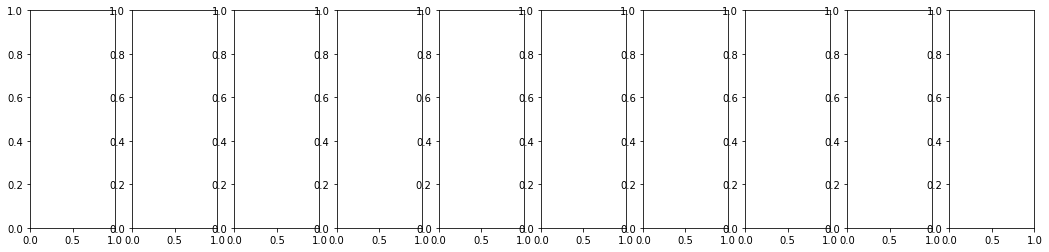

In [ ]:
data_iter = iter(testloader)
images, label = next(data_iter)
fig, axes = plt.subplots(figsize = (18,4), ncols = 10)
for nm in range(10):
  ax = axes[nm]
  helper.imshow(images[nm], ax=ax, normalize = False)

In [ ]:
test_data

In [ ]:
pip install -U albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 3.4 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [ ]:
from PIL import Image
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

In [ ]:
from torchvision import transforms,datasets
from torch.utils.data import Dataset, DataLoader
from albumentations.pytorch import ToTensorV2
import os
import cv2
import random
import torchvision

train_dataset_directory = "/content/drive/MyDrive/Drishti-GS1_files/Training/Images"
train_retina_filepaths = sorted([os.path.join(train_dataset_directory, f) for f in os.listdir(train_dataset_directory)])
train_correct_images_filepaths = [i for i in train_retina_filepaths if cv2.imread(i) is not None]

test_dataset_directory = "/content/drive/MyDrive/Drishti-GS1_files/Test/Images"
test_retina_filepaths = sorted([os.path.join(test_dataset_directory, f) for f in os.listdir(test_dataset_directory)])
test_correct_images_filepaths = [i for i in test_retina_filepaths if cv2.imread(i) is not None]


random.seed(42)
random.shuffle(train_correct_images_filepaths)
n = len(train_correct_images_filepaths)
n_train = int(n*0.8)
train_images_filepaths = train_correct_images_filepaths[:n_train]

random.seed(42)
random.shuffle(test_correct_images_filepaths)
n = len(test_correct_images_filepaths)
n_test = int(n*0.8)
test_images_filepaths = test_correct_images_filepaths[:n_test]
print(len(train_images_filepaths), len(test_images_filepaths))

18 40


In [ ]:
class RetinalDataset(Dataset):
    def __init__(self, images_filepaths, transform=None):
        self.images_filepaths = images_filepaths
        self.transform = transform

    def __len__(self):
        return len(self.images_filepaths)

    def __getitem__(self, idx):
        image_filepath = self.images_filepaths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform is not None:
            image = self.transform(image=image)["image"]
        return image

In [ ]:
train_transform = A.Compose(
    [
        A.Resize(height=128, width=128),
        A.Rotate(),
        A.GaussianBlur(sigma_limit=9, p=0.5),
        A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
        ToTensorV2(),
    ]
)

test_transform = A.Compose(
    [
        A.Resize(height=128, width=128),
        A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
        ToTensorV2(),
    ]
)

In [ ]:
train_dataset = RetinalDataset(images_filepaths=train_images_filepaths, transform=train_transform)
test_dataset = RetinalDataset(images_filepaths=test_images_filepaths, transform=test_transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

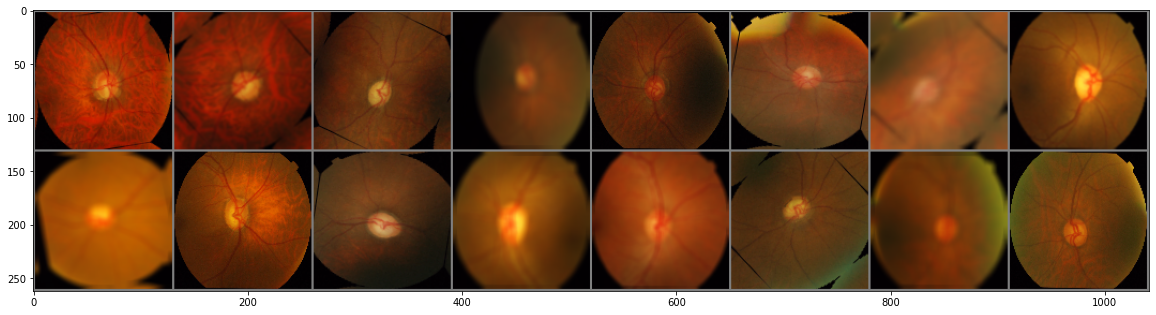

In [ ]:
def show_img(img):
    plt.figure(figsize=(20,16))
    img = img * 0.5 + 0.5  
    npimg = np.clip(img.numpy(), 0., 1.)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

data = iter(train_loader)
images = next(data)
show_img(torchvision.utils.make_grid(images))

In [ ]:
train_loader

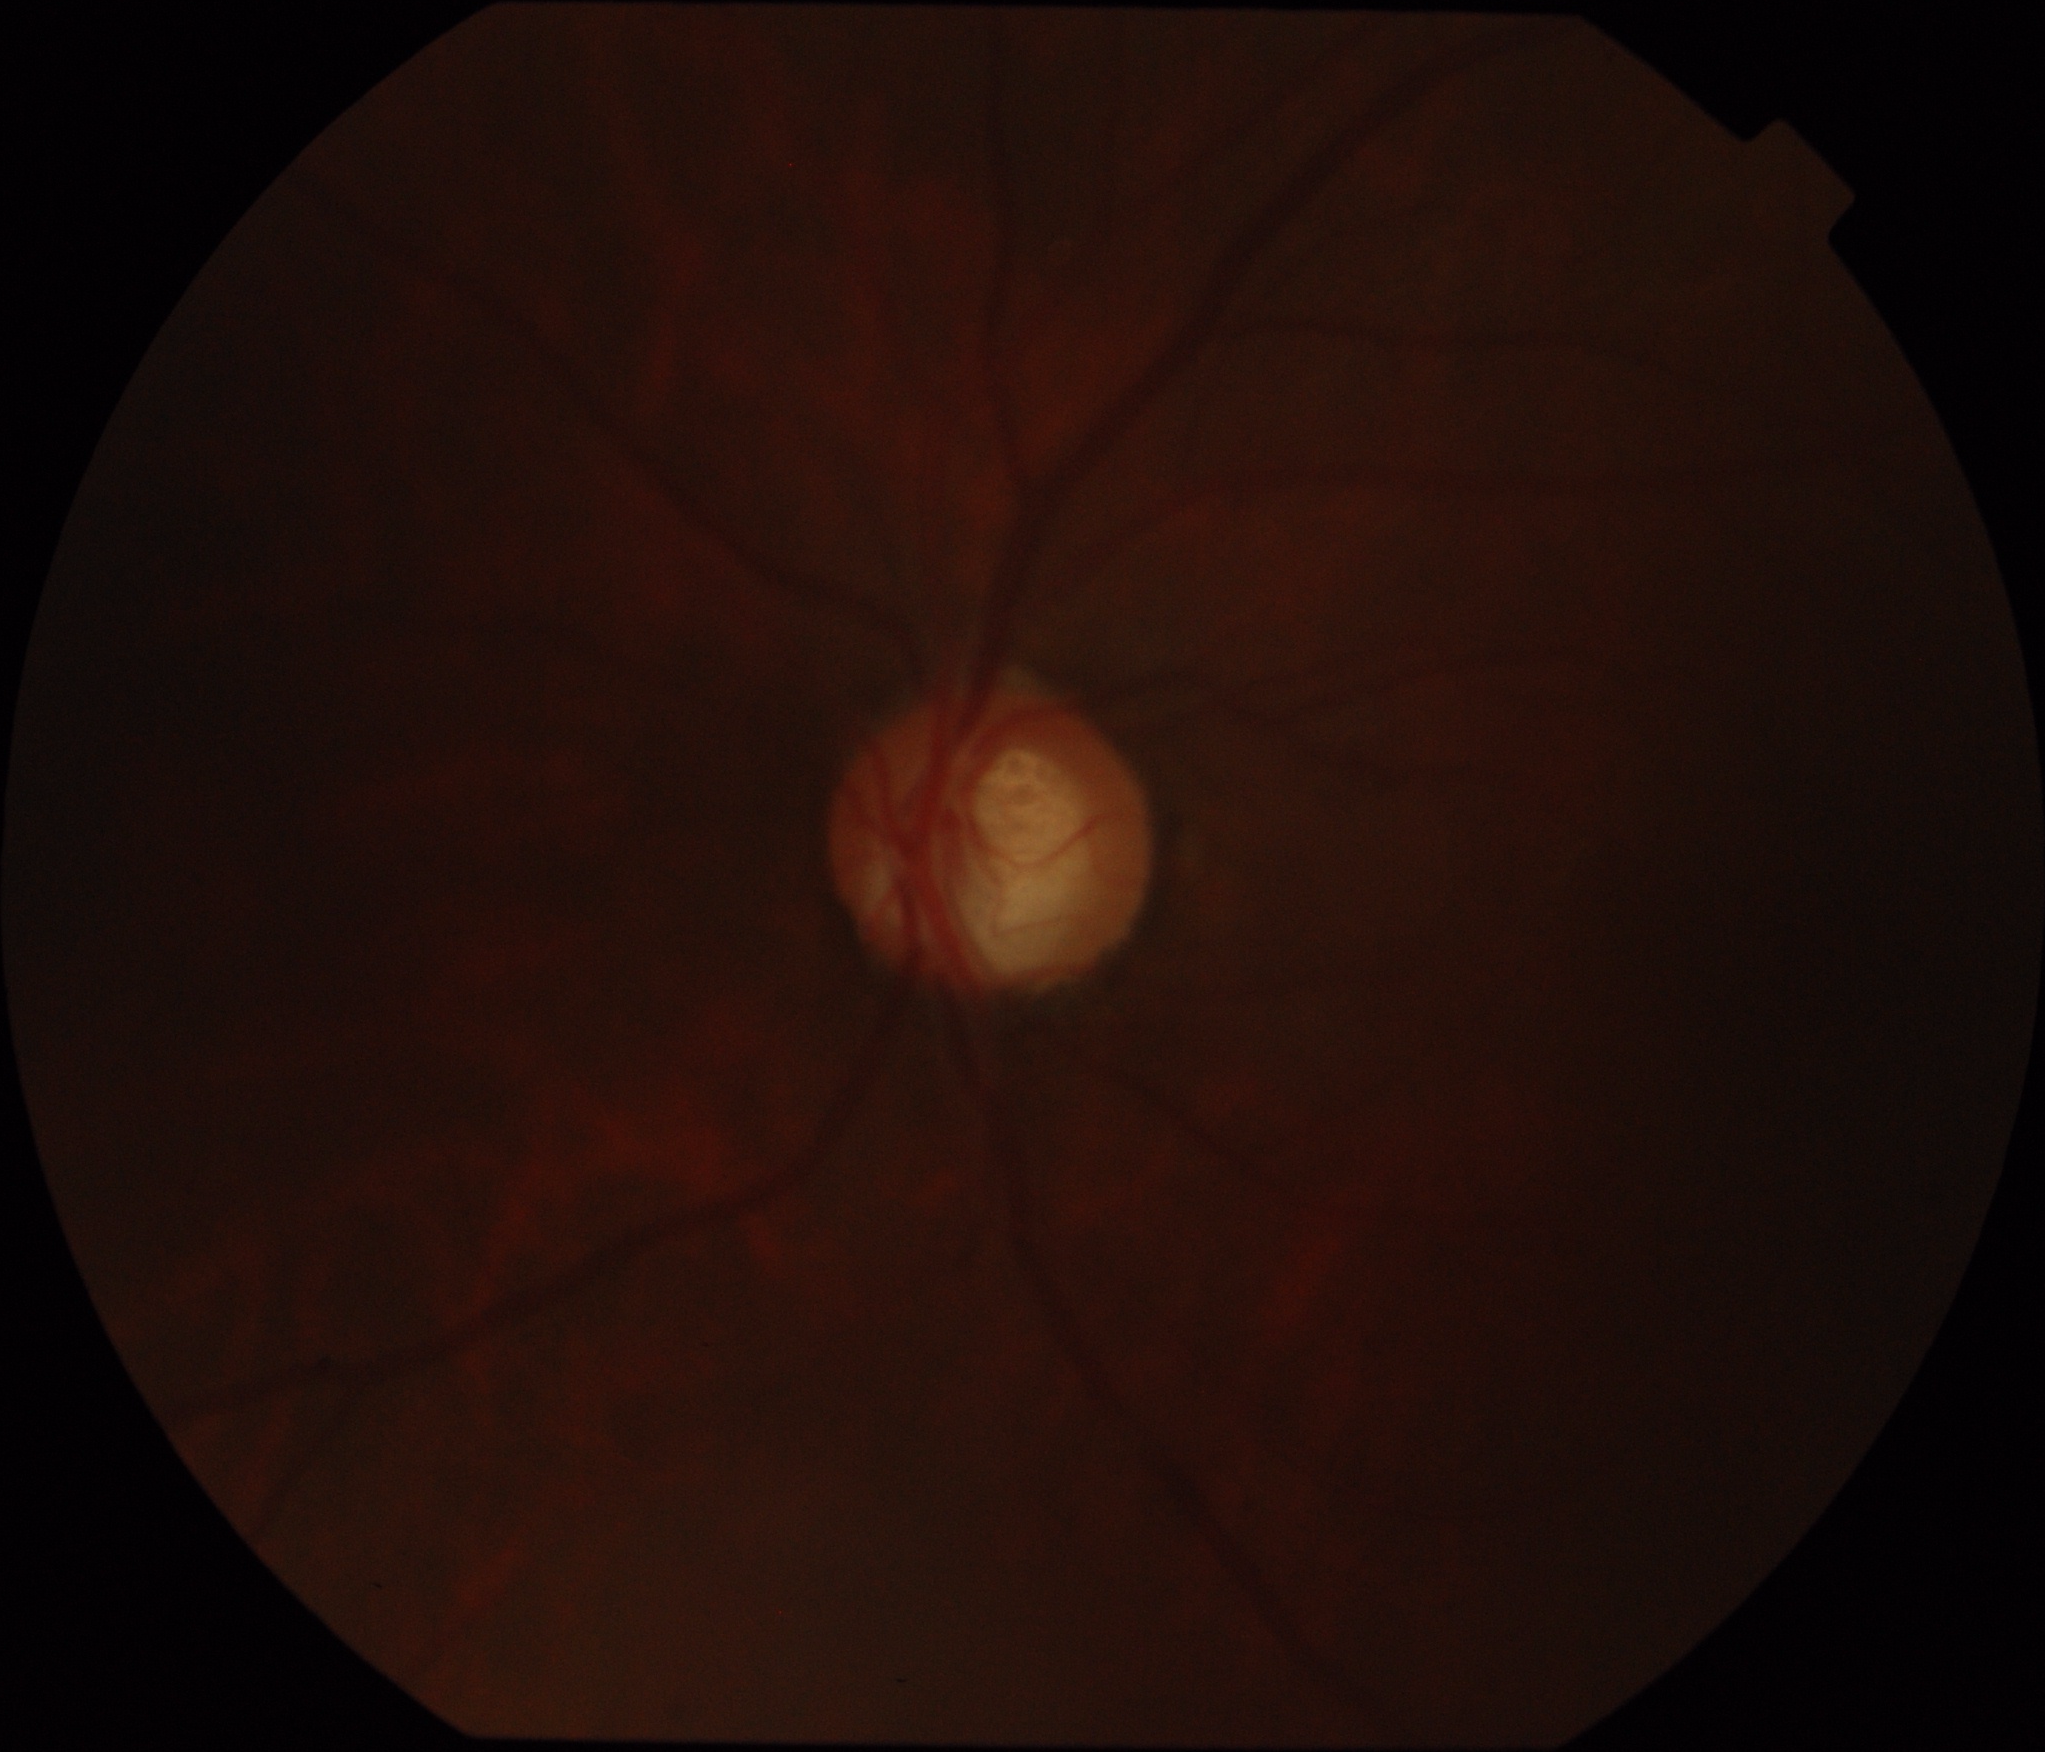

In [ ]:
from PIL import Image
import requests

url = "/content/drive/MyDrive/Drishti-GS1_files/Training/Images/drishtiGS_002.png"
im = Image.open(url)
im

In [ ]:
#from transformers import DetrFeatureExtractor

#feature_extractor = DetrFeatureExtractor.from_pretrained("facebook/detr-resnet-50-panoptic")

#encoding = feature_extractor(im, return_tensors="pt")
#encoding.keys()

In [ ]:
#encoding['pixel_values'].shape

In [ ]:
#from transformers import DetrForSegmentation

#model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")

Downloading:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/172M [00:00<?, ?B/s]

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


In [ ]:
#outputs = model(**encoding)

In [ ]:
#outputs.pred_masks.shape

In [ ]:
#import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'retina'
#import math

# compute the scores, excluding the "no-object" class (the last one)
#scores = outputs.logits.softmax(-1)[..., :-1].max(-1)[0]
# threshold the confidence
#keep = scores > 0.5

# Plot all the remaining masks
#ncols = 5
#fig, axs = plt.subplots(ncols=ncols, nrows=math.ceil(keep.sum().item() / ncols), figsize=(18, 10))
#for line in axs:
#    for a in line:
#        a.axis('off')
#for i, mask in enumerate(outputs.pred_masks[keep].detach().numpy()):
#    ax = axs[i // ncols, i % ncols]
#    ax.imshow(mask, cmap="cividis")
#    ax.axis('off')
#fig.tight_layout()
     

In [ ]:
from PIL import Image
import requests
import io
import math
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import torch
from torch import nn
from torchvision.models import resnet50
import torchvision.transforms as T
import numpy
torch.set_grad_enabled(False);

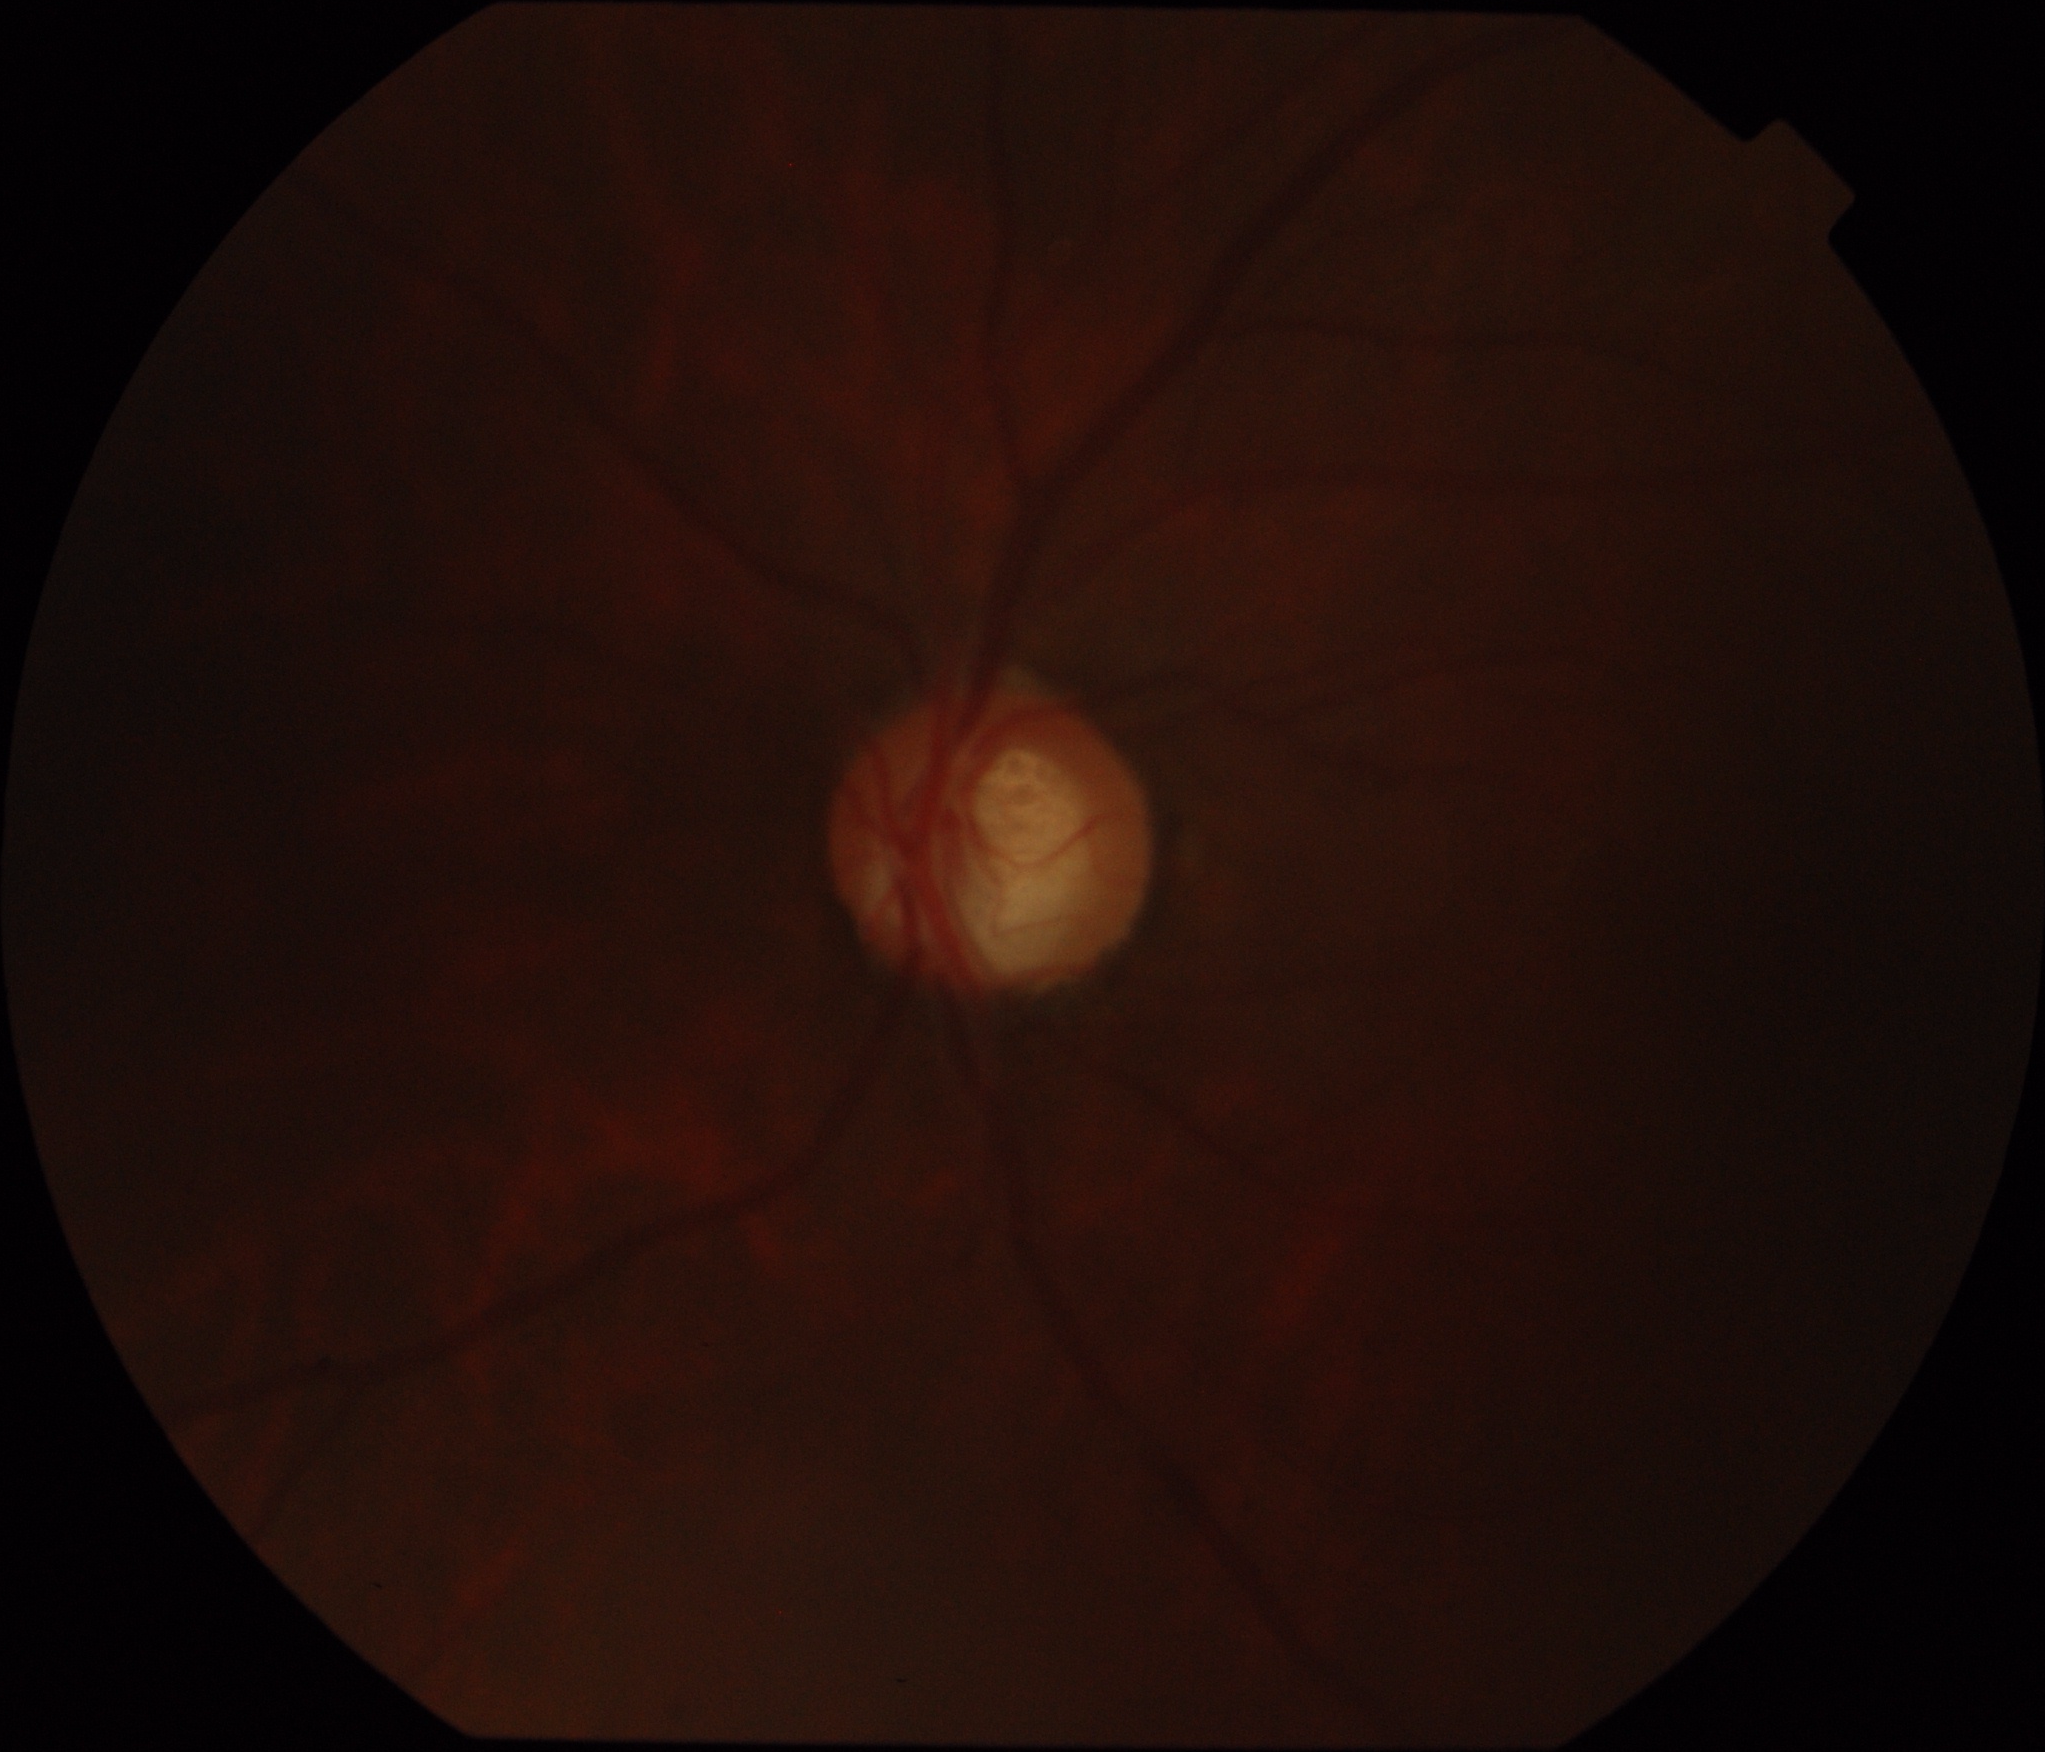

In [ ]:
from PIL import Image
import requests

#url = "/content/drive/MyDrive/Drishti-GS1_files/Training/Images/drishtiGS_002.png"
im = Image.open(r"/content/drive/MyDrive/Drishti-GS1_files/Training/Images/drishtiGS_002.png")
im

In [ ]:
! pip install git+https://github.com/cocodataset/panopticapi.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-n2soxx8v
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-n2soxx8v
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=71e5598855c20386d55db42318ab300168db16361d371706067cbeaeefbd6218
  Stored in directory: /tmp/pip-ephem-wheel-cache-p9tn19_7/wheels/b3/fc/e3/2463e5db55087b06e9c3bb117af1a63a080d1ec4c33291cec9
Successfully built panopticapi


In [ ]:
import panopticapi
from panopticapi.utils import id2rgb, rgb2id

In [ ]:
model, postprocessor = torch.hub.load('facebookresearch/detr', 'detr_resnet101_panoptic', pretrained=True, return_postprocessor=True, num_classes=250)
model.eval();

Downloading: "https://github.com/facebookresearch/detr/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r101-panoptic-40021d53.pth" to /root/.cache/torch/hub/checkpoints/detr-r101-panoptic-40021d53.pth


  0%|          | 0.00/237M [00:00<?, ?B/s]

In [ ]:
# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
img = transform(im).unsqueeze(0)
out = model(img)

1


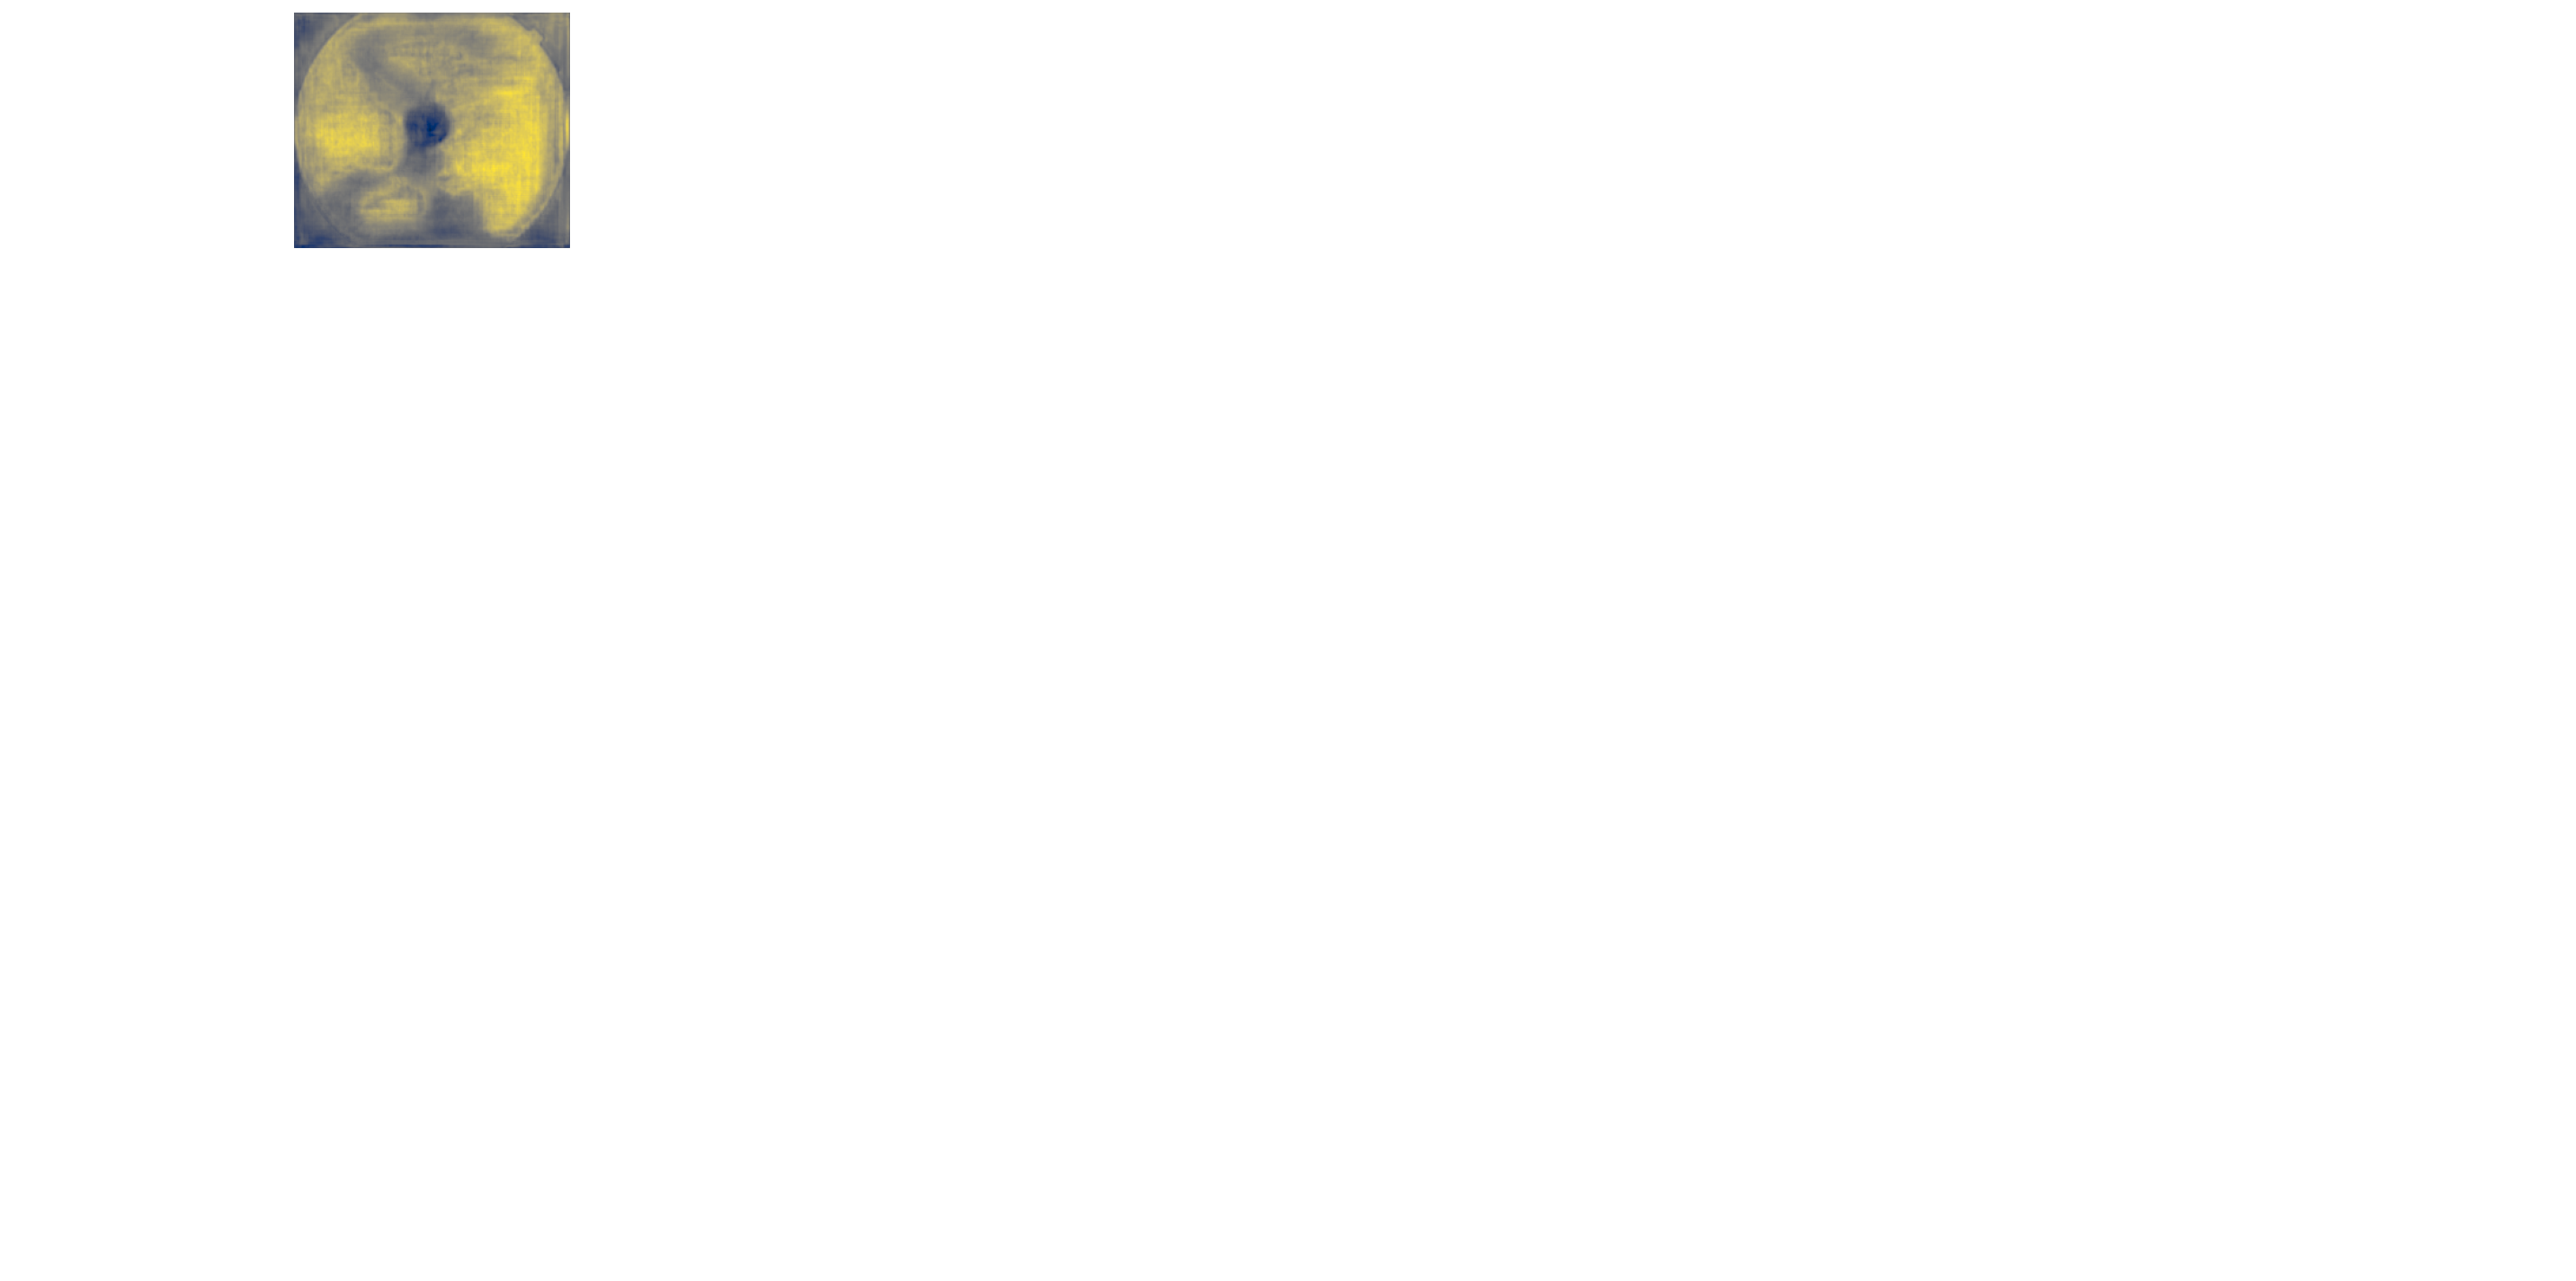

In [ ]:
# compute the scores, excluding the "no-object" class (the last one)
scores = out["pred_logits"].softmax(-1)[..., :-1].max(-1)[0]
# threshold the confidence
keep = scores > 0.6

# Plot all the remaining masks
ncols = 5
print(math.ceil(keep.sum().item()/ncols))
fig, axs = plt.subplots(ncols,3, figsize=(20, 10))
for line in axs:
#    print(ncols)
    for a in line:
#        print(a)
        a.axis('off')
for i, mask in enumerate(out["pred_masks"][keep]):
    ax = axs[i // ncols, i % ncols]
    ax.imshow(mask, cmap="cividis")
    ax.axis('off')
fig.tight_layout()

In [ ]:
def remove_nerves(image):
    img = array_to_img(image)
    
    img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
    # convert image to grayScale
    grayScale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
   
    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))
   
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
  
    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv